In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


df['Car Model'] = df['Car Model'].replace({
    'BMW X5' : 0,
    'Audi A5' : 1,
    'Mercedez Benz C class' : 2
})
df

In [3]:
df1 = df[df['Car Model'] == 'BMW X5']
df2 = df[df['Car Model'] == 'Audi A5']
df3 = df[df['Car Model'] == 'Mercedez Benz C class']

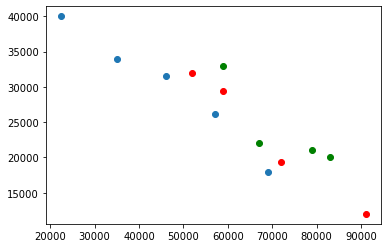

In [4]:
plt.scatter(df1.Mileage, df1['Sell Price($)'])
plt.scatter(df2.Mileage, df2['Sell Price($)'], color = 'red')
plt.scatter(df3.Mileage, df3['Sell Price($)'], color = 'green')

In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [6]:
transformed = ohe.fit_transform(df[['Car Model']]).toarray()
transformed

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [7]:
ohe.categories_

[array(['Audi A5', 'BMW X5', 'Mercedez Benz C class'], dtype=object)]

In [8]:
df[ohe.categories_[0]] = transformed
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0.0,1.0,0.0
1,BMW X5,35000,34000,3,0.0,1.0,0.0
2,BMW X5,57000,26100,5,0.0,1.0,0.0
3,BMW X5,22500,40000,2,0.0,1.0,0.0
4,BMW X5,46000,31500,4,0.0,1.0,0.0


In [10]:
df.drop(['Car Model', 'Mercedez Benz C class'], axis = 1, inplace = True)
df.head()


,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0.0,1.0
1,35000,34000,3,0.0,1.0
2,57000,26100,5,0.0,1.0
3,22500,40000,2,0.0,1.0
4,46000,31500,4,0.0,1.0


In [12]:
x = df.drop('Sell Price($)', axis = 1)
x.head(3)

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0.0,1.0
1,35000,3,0.0,1.0
2,57000,5,0.0,1.0


In [16]:
y = df['Sell Price($)']
y.head(3)

0    18000
1    34000
2    26100
Name: Sell Price($), dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(x,y)

LinearRegression()

In [19]:
model.score(x,y)

0.9417050937281082

In [20]:
model.predict([[45000,4,0,0]])

C:\Users\seher\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [21]:
model.predict([[86000,7,0,1]])

C:\Users\seher\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])